In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read dataframes from the files.

In [2]:
df_comments = pd.read_csv('main_comments.csv')

In [3]:
df_submissions = pd.read_csv('main_submissions.csv')

In [4]:
df_comments

,id,score,link_id,author,subreddit,created_utc
0,t1_gl0hhsq,1,t3_l6a44e,Io99IHkg-4QzX6xbKwbte0cuzp4=,wallstreetbets,1611788340
1,t1_gmd0xrl,1,t3_lehibh,1UBdU9GQvCnnXQHAcYaG1uL9V_U=,RedditSessions,1612683157
2,t1_gggg1ed,1,t3_kgocvo,Io99IHkg-4QzX6xbKwbte0cuzp4=,memes,1608454223
3,t1_g7zggfh,1,t3_j6n57d,EA1r-K5p_lVBLesLhCFRrKOPN-I=,videos,1602058834
4,t1_fn060jg,26,t3_fyheuv,_aeNuqWD_AT5JIfooWYpKiZR8qg=,nfl,1586536065
...,...,...,...,...,...,...
27997318,t1_f8sotb4,1,t3_e20bxb,EA1r-K5p_lVBLesLhCFRrKOPN-I=,Showerthoughts,1574785778
27997319,t1_eczq4gz,1,t3_abbin1,Pkz1m3vsliYpbnltUnWaQkPFLEo=,AskReddit,1546315274
27997320,t1_f240cz6,0,t3_dbujdv,NfwullBPKgqUPvj_Qr6RPnH1hrI=,DestinyTheGame,1569942007
27997321,t1_em778f3,2,t3_bj2bnd,kj12hcxGWPd3LxjKCNpoPFTDNBQ=,funny,1556683776


In [5]:
df_submissions

,id,author,created_utc,domain,is_self,score,subreddit
0,t3_kby7v8,ZkakZ8xfXNiL6wUXhJhRU3Ysa7c=,1607811261,self.AskReddit,True,3,AskReddit
1,t3_nwccst,pQ8j9hcuty1RBfCkUutL0cy9Zco=,1623290593,i.redd.it,False,11,pics
2,t3_ik55fe,GH3YzjQCtBT4DkTjcxWb2-vPoa0=,1598903369,self.Market76,True,0,Market76
3,t3_hkl0qs,57zAuZ7GS2EvQeCSXqU19wYZgjs=,1593790032,v.redd.it,False,1,funny
4,t3_jdrjpp,HY8UtHbd9PNUDFmaAkm4-10hgmA=,1603066751,i.redd.it,False,578,PrequelMemes
...,...,...,...,...,...,...,...
1857436,t3_cqojdd,Io99IHkg-4QzX6xbKwbte0cuzp4=,1565868449,i.redd.it,False,1,FIFA
1857437,t3_amszup,Io99IHkg-4QzX6xbKwbte0cuzp4=,1549222271,i.redd.it,False,1,dankmemes
1857438,t3_dpfmog,cCp3C69w-4gcIYjKtvJpPmsjqdM=,1572481507,i.redd.it,False,15,teenagers
1857439,t3_bwulmr,2xibwTUA50T87ThesoIxnimOjKw=,1559685003,i.redd.it,False,12,aww


## Data collection and cleaning

Filter out the lines with incorrectly hashed usernames.

In [347]:
wrong_username = ['Io99IHkg-4QzX6xbKwbte0cuzp4=', 'EA1r-K5p_lVBLesLhCFRrKOPN-I=']
df_com = df_comments[~df_comments['author'].isin(wrong_username)] # filtered df_comments
df_sub = df_submissions[~df_submissions['author'].isin(wrong_username)] # filtered df_submissions

Try to figure out which subreddits are politically related.

In [348]:
subreddits = df_com['subreddit'].unique()
print(len(subreddits))
subreddits

92


array(['RedditSessions', 'nfl', 'soccer', 'ukpolitics', 'AskReddit',
       'unpopularopinion', 'news', 'memes', 'EscapefromTarkov',
       'teenagers', 'politics', 'worldnews', 'PrequelMemes',
       'distantsocializing', 'dankmemes', 'aww', 'Coronavirus',
       'Showerthoughts', 'TheYouShow', 'CFB', 'Animemes', 'neoliberal',
       'CryptoCurrency', 'europe', 'apexlegends', 'DestinyTheGame',
       'gaming', 'HistoryMemes', 'SquaredCircle', 'videos',
       'pcmasterrace', 'ACTrade', 'AmItheAsshole', 'NoStupidQuestions',
       'todayilearned', 'Genshin_Impact', 'funny', 'FortNiteBR',
       'PewdiepieSubmissions', 'Superstonk', 'barstoolsports',
       'wallstreetbets', 'nba', 'Whatcouldgowrong', 'PublicFreakout',
       'facepalm', 'Market76', 'relationship_advice', 'pics', 'formula1',
       'relationships', 'WTF', 'FreeKarma4U', 'RocketLeagueExchange',
       'gifs', 'wow', 'modernwarfare', 'mildlyinteresting',
       'PoliticalCompassMemes', 'personalfinance', 'AskMen', 'PS5',


It turns out that there are only 92 different subreddits occurring, which is not a lot. For the sake of accuracy we will manually identify the
(overtly) political subreddits. Then we filter the two dataframes with the array of political subreddits.

In [7]:
political_subreddits = ['ukpolitics', 'news', 'worldnews', 'neoliberal', 'Conservative', 'PoliticalCompassMemes', 'PoliticalHumor']
political_subreddits

['ukpolitics',
 'news',
 'worldnews',
 'neoliberal',
 'Conservative',
 'PoliticalCompassMemes',
 'PoliticalHumor']

In [349]:
df_com = df_com[df_com['subreddit'].isin(political_subreddits)]
df_sub = df_sub[df_sub['subreddit'].isin(political_subreddits)]
df_c = df_com.copy()
df_s = df_sub.copy()

## Distribution of GS-scores

Apply word embedding with bigrams. Generate the vector representations of the communities.

In [48]:
import pandas as pd
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import word_tokenize

df_c['tokenized'] = df_c['subreddit'].apply(lambda x: word_tokenize(str(x)))
phrases = Phrases(df_c['tokenized_comments'].tolist(), min_count=1, threshold=1)
bigram = Phraser(phrases)
df_c['bigrams'] = df_c['tokenized'].apply(lambda x: bigram[x])

# parameters
embedding_size = 20
window_size = 5
min_count = 1
workers = 4
model = Word2Vec(sentences=df_c['bigrams'].tolist(),
                 vector_size=embedding_size,
                 window=window_size,
                 min_count=min_count,
                 workers=workers)

community_vectors = {community: model.wv[community] for community in model.wv.index_to_key}

Create a user dataframe. Currently it stores the users' contribution to each community.

In [238]:
user_df = df_c.groupby(['author', 'subreddit']).size().reset_index(name='comment_count')
user_df = user_df.pivot_table(index='author', columns='subreddit', values='comment_count', fill_value=0)
user_df

subreddit,Conservative,PoliticalCompassMemes,PoliticalHumor,neoliberal,news,ukpolitics,worldnews
author,,,,,,,
--0MG4-PX8W1RTKjNYbeM58jtxE=,0.0,0.0,1.0,0.0,11.0,0.0,5.0
--1ACGghkLj28PBR19PMC21iGjg=,1.0,0.0,0.0,0.0,0.0,0.0,0.0
--2J5vqA0Ol615MUC_Dv9MJHYzk=,0.0,0.0,0.0,0.0,0.0,0.0,1.0
--3IiJBuHa9HRyYx5HITJRD8KPU=,0.0,1.0,0.0,0.0,0.0,0.0,0.0
--3YJBV2H1EqDTvfcCSaV9wFepw=,0.0,5.0,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
zzx1jtzHEluyb-nEsBBSC6MSwJQ=,1.0,0.0,0.0,0.0,0.0,0.0,0.0
zzxIwT3zhog9L2NMIATSzEzyX_g=,0.0,0.0,0.0,0.0,1.0,0.0,0.0
zzyHRqzwATjGUdjypQnyDpkpX-w=,0.0,0.0,0.0,0.0,0.0,9.0,0.0


Calculate the center of mass of all users.

In [239]:
import numpy as np

temp_user_df = user_df.copy()
for subreddit in user_df.columns:
    temp_user_df[f'{subreddit}_sum'] = temp_user_df[subreddit].apply(lambda x: np.multiply(x, community_vectors[subreddit]))
temp_user_df['com'] = temp_user_df['Conservative_sum']+temp_user_df['PoliticalCompassMemes_sum']+temp_user_df['PoliticalHumor_sum']+temp_user_df['neoliberal_sum']+temp_user_df['news_sum']+temp_user_df['ukpolitics_sum']+temp_user_df['worldnews_sum']
temp_user_df.drop(columns=['Conservative_sum','PoliticalCompassMemes_sum','PoliticalHumor_sum','neoliberal_sum','news_sum','ukpolitics_sum','worldnews_sum'], inplace=True)
user_df = temp_user_df.copy()
user_df

subreddit,Conservative,PoliticalCompassMemes,PoliticalHumor,neoliberal,news,ukpolitics,worldnews,com
author,,,,,,,,
--0MG4-PX8W1RTKjNYbeM58jtxE=,0.0,0.0,1.0,0.0,11.0,0.0,5.0,"[0.34564298, 0.3031039, 0.52520627, 0.29589912..."
--1ACGghkLj28PBR19PMC21iGjg=,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.011741882, -0.022595162, 0.04194366, -0.049..."
--2J5vqA0Ol615MUC_Dv9MJHYzk=,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[-0.0026811361, 0.0011821568, 0.025516748, 0.0..."
--3IiJBuHa9HRyYx5HITJRD8KPU=,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"[-0.04801775, 0.025036465, -0.04379793, -0.021..."
--3YJBV2H1EqDTvfcCSaV9wFepw=,0.0,5.0,2.0,0.0,1.0,0.0,0.0,"[-0.2897268, 0.18719102, -0.13330233, -0.04856..."
...,...,...,...,...,...,...,...,...
zzx1jtzHEluyb-nEsBBSC6MSwJQ=,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.011741882, -0.022595162, 0.04194366, -0.049..."
zzxIwT3zhog9L2NMIATSzEzyX_g=,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"[0.03655883, 0.02535131, 0.033788465, 0.003814..."
zzyHRqzwATjGUdjypQnyDpkpX-w=,0.0,0.0,0.0,0.0,0.0,9.0,0.0,"[-0.03854506, 0.12719534, 0.2430643, 0.3173695..."


Calculate GS-score as defined (weighted cosine similarity)

In [293]:
temp_user_df = user_df.copy()
temp_user_df.drop(columns=['com'], inplace=True)
for subreddit in temp_user_df.columns:
    temp_user_df[f'{subreddit}_sub'] = user_df['com']
temp_user_df.drop(columns=['Conservative','PoliticalCompassMemes','PoliticalHumor','neoliberal','news','ukpolitics','worldnews'], inplace=True)
for subreddit in user_df.columns[:-1]:
    temp_user_df[f'{subreddit}_sub'] = temp_user_df[f'{subreddit}_sub'].apply(lambda x: np.dot(community_vectors[subreddit], x))
column_name_mapping = {'Conservative_sub':'Conservative','PoliticalCompassMemes_sub':'PoliticalCompassMemes','PoliticalHumor_sub':'PoliticalHumor','neoliberal_sub':'neoliberal','news_sub':'news','ukpolitics_sub':'ukpolitics','worldnews_sub':'worldnews'}
temp_user_df.rename(columns=column_name_mapping, inplace=True)
temp_user_df['com'] = 0
# temp_user_df['sum'] = temp_user_df['Conservative_sub']+temp_user_df['PoliticalCompassMemes_sub']+temp_user_df['PoliticalHumor_sub']+temp_user_df['neoliberal_sub']+temp_user_df['news_sub']+temp_user_df['ukpolitics_sub']+temp_user_df['worldnews_sub']
    # temp_user_df[f'{subreddit}_sub'] = temp_user_df[subreddit].apply(lambda x: np.multiply(temp_user_df[subreddit], np.dot(community_vectors[subreddit], temp_user_df['com']) / np.linalg.norm(temp_user_df['com'])))
temp_user_df = user_df * temp_user_df
temp_user_df.drop(columns=['com'], inplace=True)
temp_user_df['sum'] = temp_user_df['Conservative']+temp_user_df['PoliticalCompassMemes']+temp_user_df['PoliticalHumor']+temp_user_df['neoliberal']+temp_user_df['news']+temp_user_df['ukpolitics']+temp_user_df['worldnews']
for index, row in temp_user_df.iterrows():
    temp_user_df.loc[index, 'sum'] = temp_user_df.loc[index, 'sum'] / np.linalg.norm(user_df.loc[index, 'com'])
temp_user_df

subreddit,Conservative,PoliticalCompassMemes,PoliticalHumor,neoliberal,news,ukpolitics,worldnews,sum
author,,,,,,,,
--0MG4-PX8W1RTKjNYbeM58jtxE=,-0.000000,-0.000000,0.061417,0.0,1.925226,-0.000000,0.530648,1.586597
--1ACGghkLj28PBR19PMC21iGjg=,0.019373,0.000000,0.000000,0.0,0.000000,-0.000000,-0.000000,0.139185
--2J5vqA0Ol615MUC_Dv9MJHYzk=,-0.000000,-0.000000,0.000000,0.0,0.000000,-0.000000,0.018019,0.134235
--3IiJBuHa9HRyYx5HITJRD8KPU=,0.000000,0.020968,-0.000000,0.0,-0.000000,-0.000000,-0.000000,0.144802
--3YJBV2H1EqDTvfcCSaV9wFepw=,0.000000,0.510851,0.065148,0.0,0.006736,-0.000000,-0.000000,0.763370
...,...,...,...,...,...,...,...,...
zzx1jtzHEluyb-nEsBBSC6MSwJQ=,0.019373,0.000000,0.000000,0.0,0.000000,-0.000000,-0.000000,0.139185
zzxIwT3zhog9L2NMIATSzEzyX_g=,0.000000,-0.000000,0.000000,0.0,0.015441,-0.000000,0.000000,0.124262
zzyHRqzwATjGUdjypQnyDpkpX-w=,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,1.100185,-0.000000,1.048897


In [297]:
selected_columns = political_subreddits
temp_user_df['nonzero_count'] = temp_user_df[selected_columns].apply(lambda row: row.astype(bool).sum(), axis=1)
temp_user_df['GS_score'] = temp_user_df['sum'] / temp_user_df['nonzero_count']
temp_user_df

subreddit,Conservative,PoliticalCompassMemes,PoliticalHumor,neoliberal,news,ukpolitics,worldnews,sum,nonzero_count,GS_score
author,,,,,,,,,,
--0MG4-PX8W1RTKjNYbeM58jtxE=,-0.000000,-0.000000,0.061417,0.0,1.925226,-0.000000,0.530648,1.586597,3,0.528866
--1ACGghkLj28PBR19PMC21iGjg=,0.019373,0.000000,0.000000,0.0,0.000000,-0.000000,-0.000000,0.139185,1,0.139185
--2J5vqA0Ol615MUC_Dv9MJHYzk=,-0.000000,-0.000000,0.000000,0.0,0.000000,-0.000000,0.018019,0.134235,1,0.134235
--3IiJBuHa9HRyYx5HITJRD8KPU=,0.000000,0.020968,-0.000000,0.0,-0.000000,-0.000000,-0.000000,0.144802,1,0.144802
--3YJBV2H1EqDTvfcCSaV9wFepw=,0.000000,0.510851,0.065148,0.0,0.006736,-0.000000,-0.000000,0.763370,3,0.254457
...,...,...,...,...,...,...,...,...,...,...
zzx1jtzHEluyb-nEsBBSC6MSwJQ=,0.019373,0.000000,0.000000,0.0,0.000000,-0.000000,-0.000000,0.139185,1,0.139185
zzxIwT3zhog9L2NMIATSzEzyX_g=,0.000000,-0.000000,0.000000,0.0,0.015441,-0.000000,0.000000,0.124262,1,0.124262
zzyHRqzwATjGUdjypQnyDpkpX-w=,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,1.100185,-0.000000,1.048897,1,1.048897


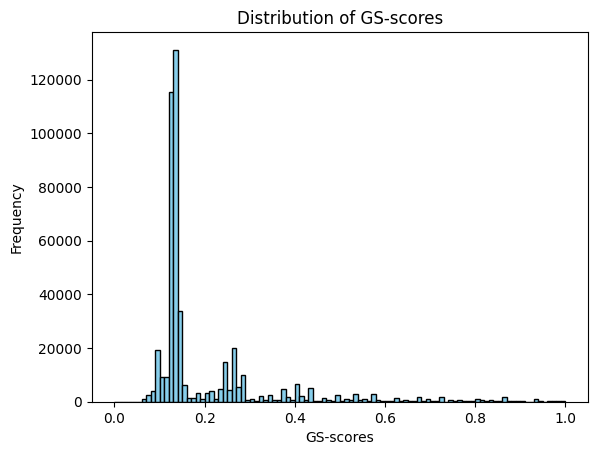

In [340]:
plt.hist(temp_user_df['GS_score'], bins=100, range=(0,1), color='skyblue', edgecolor='black')
plt.title('Distribution of GS-scores')
plt.xlabel('GS-scores')
plt.ylabel('Frequency')
plt.show()

## Detecting political echo chambers

In [350]:
column_name_mapping = {'id':'link_id'}
df_sub.rename(columns=column_name_mapping, inplace=True)
merged_df = pd.merge(df_com, df_sub, on='link_id')
merged_df

,id,score_x,link_id,author_x,subreddit_x,created_utc_x,author_y,created_utc_y,domain,is_self,score_y,subreddit_y
0,t1_glpo1t2,1,t3_lajdod,sMni3r8MhE9CJG3rCC1jU9pZkoo=,news,1612258250,tCcx71qRWwx6CXRopRov9870Xh8=,1612227411,starnewsonline.com,False,39118,news
1,t1_glpvjoa,6,t3_lajdod,0bTmGkKLhF8SXE4i-C8EtkGEBHs=,news,1612264829,tCcx71qRWwx6CXRopRov9870Xh8=,1612227411,starnewsonline.com,False,39118,news
2,t1_glp31wg,4,t3_lajdod,R-k5TlOabwQX1seBaz3nwy6UEcs=,news,1612241962,tCcx71qRWwx6CXRopRov9870Xh8=,1612227411,starnewsonline.com,False,39118,news
3,t1_glp1qxk,102,t3_lajdod,Xa2mJtDWxyYtTu3t2XnbySGf9Tw=,news,1612241179,tCcx71qRWwx6CXRopRov9870Xh8=,1612227411,starnewsonline.com,False,39118,news
4,t1_glsmvrw,1,t3_lajdod,YZRL9qpPtQnd6BTe9TQyWO3krUg=,news,1612307299,tCcx71qRWwx6CXRopRov9870Xh8=,1612227411,starnewsonline.com,False,39118,news
...,...,...,...,...,...,...,...,...,...,...,...,...
32509,t1_eme9ij1,8,t3_bk6hyu,b-s-Hx9eeMTnlJjTDQhMvSS_Luk=,ukpolitics,1556876382,w3tHhToc3ewW6Gaj47IC3lPmXb0=,1556876041,self.ukpolitics,True,11,ukpolitics
32510,t1_f6p94oo,35,t3_dsdx3m,gJfwnhUcZdRXa5TrMaTpvOCBow8=,neoliberal,1573050796,wMm379U8KUwP3_46bEQm2-u70xE=,1573032196,self.neoliberal,True,52,neoliberal
32511,t1_efilejb,1,t3_am1ruo,1r4TYVFubD7WhKclaElPCFBamMU=,PoliticalHumor,1549026294,JaZjW-WZIh6mJYpCwlGot402eSA=,1549026097,i.redd.it,False,46,PoliticalHumor
32512,t1_f23qu5x,2,t3_dbrj9h,MrxHvF3xnX1j7j6eTJ_25ih36eA=,worldnews,1569935131,xTT2vngysFFidd-8xry5cv7wl48=,1569926611,china-underground.com,False,31,worldnews


In [362]:
user_df_simp = temp_user_df.copy()
user_df_simp = user_df_simp[user_df_simp.columns[-1:]]
column_name_mapping = {'author_y':'author'}
merged_df.rename(columns=column_name_mapping, inplace=True)
merged_df = pd.merge(merged_df, user_df_simp, on='author')
merged_df

,id,score_x,link_id,author_x,subreddit_x,created_utc_x,author,created_utc_y,domain,is_self,score_y,subreddit_y,GS_score
0,t1_edvfes2,2,t3_af2hyz,KgxHuPIBC_Rl6AtUTGkMaHW6xwg=,worldnews,1547273677,uIxMcrI9a0N_im-zl4QNNdXRrf8=,1547256539,nytimes.com,False,77119,worldnews,0.134235
1,t1_edvd80b,1,t3_af2hyz,ysp3cNBx13WamiQ8Sq36jZh2Nqg=,worldnews,1547271401,uIxMcrI9a0N_im-zl4QNNdXRrf8=,1547256539,nytimes.com,False,77119,worldnews,0.134235
2,t1_edvh9on,1,t3_af2hyz,YTXkg7WWLGl_Qy4zBtaaLuUbr8o=,worldnews,1547275905,uIxMcrI9a0N_im-zl4QNNdXRrf8=,1547256539,nytimes.com,False,77119,worldnews,0.134235
3,t1_edw0mkp,2,t3_af2hyz,IdgYKhC_3ymCx-a_Y79bzfsjRxg=,worldnews,1547295953,uIxMcrI9a0N_im-zl4QNNdXRrf8=,1547256539,nytimes.com,False,77119,worldnews,0.134235
4,t1_edvf8bz,1,t3_af2hyz,S314p8gfoDZMLTfETEAGcJ5ULUs=,worldnews,1547273483,uIxMcrI9a0N_im-zl4QNNdXRrf8=,1547256539,nytimes.com,False,77119,worldnews,0.134235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6870,t1_egmdwoe,-16,t3_ar9s8k,7-0mmKq2XIEIt3TN7fesKSjQAVE=,PoliticalHumor,1550352846,KXBN9T22C5LbM8ts95SYQk6x1kI=,1550331194,i.redd.it,False,251,PoliticalHumor,0.150719
6871,t1_ez1ev6d,4,t3_czu47l,g6FyH0r0JQdv4pmzd_8Z7l6Fvz4=,PoliticalHumor,1567647282,Pty9SM5EyFH6A8d7ddL_-Xxkak0=,1567647178,i.redd.it,False,17,PoliticalHumor,1.026472
6872,t1_fcmvk5f,1,t3_ei1yjp,1FBUp2Avify8XJwyJxDtZsk5-mw=,worldnews,1577794273,YKNucrS_T54eYMa0z1O18ZJJGgA=,1577793259,nypost.com,False,3,worldnews,1.633239
6873,t1_eppiek4,6,t3_bvbgrs,c-OFPGaKIFcqrU8bsuONtQYQuUI=,PoliticalCompassMemes,1559380979,2K45z6FT_Iki6s-vCCSSrCKSyw4=,1559329115,i.ibb.co,False,133,PoliticalCompassMemes,0.539530


In [ ]:
for index, row in df_com.iterrows():
    index